<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/14_constant_initalization_relu_sigmoid_tanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/ushape.csv',names=['X1',"X2",'y'])

In [3]:
df.sample(1)

,X1,X2,y
33,0.419472,-0.324781,1.0


In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
# try changing first activation as tanh/relu
# result is same : perceptron

In [16]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=X.shape[1]))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
initial_weight=model.get_weights()

In [18]:
initial_weight[0]=np.ones(initial_weight[0].shape)*0.5
initial_weight[1]=np.ones(initial_weight[1].shape)*0.5
initial_weight[2]=np.ones(initial_weight[2].shape)*0.5
initial_weight[3]=np.ones(initial_weight[3].shape)*0.5

In [19]:
initial_weight

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]]),
 array([0.5])]

In [20]:
model.set_weights(initial_weight)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history=model.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4885 - loss: 2.4056 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5031 - loss: 2.3420
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4740 - loss: 2.5510
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5063 - loss: 2.3052
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4781 - loss: 2.2829
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4865 - loss: 2.2518
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4812 - loss: 2.1910
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5135 - loss: 2.0557
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5510 - loss: 1.8901
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4990 - loss: 2.0445
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4740 - loss: 2.0968
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4958 - l

In [23]:
model.get_weights()

[array([[0.34477493, 0.34477493, 0.34477493, 0.34477493, 0.34477493,
         0.34477493, 0.34477493, 0.34477493, 0.34477493, 0.34477493],
        [0.20385519, 0.20385519, 0.20385519, 0.20385519, 0.20385519,
         0.20385519, 0.20385519, 0.20385519, 0.20385519, 0.20385519]],
       dtype=float32),
 array([0.23505794, 0.23505794, 0.23505794, 0.23505794, 0.23505794,
        0.23505794, 0.23505794, 0.23505794, 0.23505794, 0.23505794],
       dtype=float32),
 array([[0.21854818],
        [0.21854818],
        [0.21854818],
        [0.21854818],
        [0.21854818],
        [0.21854818],
        [0.21854818],
        [0.21854818],
        [0.21854818],
        [0.21854818]], dtype=float32),
 array([0.16105427], dtype=float32)]

In [24]:
# trying activation=sigmoid

In [25]:
model1=Sequential()
model1.add(Dense(10,activation='sigmoid',input_dim=X.shape[1]))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model1.get_weights()

[array([[ 0.46905428, -0.40435112, -0.17729491, -0.5072955 ,  0.16477412,
         -0.5305366 , -0.48290813,  0.2400086 , -0.65881306, -0.57417524],
        [-0.5082827 , -0.4566599 , -0.5803862 ,  0.4943642 , -0.33958355,
         -0.24963644,  0.20348686, -0.4826212 ,  0.68685836, -0.47904006]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.05131769],
        [ 0.1000936 ],
        [-0.46095496],
        [-0.60217786],
        [-0.2736099 ],
        [ 0.39660758],
        [-0.37420234],
        [-0.6908468 ],
        [ 0.7209918 ],
        [ 0.17892367]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
inital_weight=model1.get_weights

In [32]:
initial_weight[0]=np.ones(initial_weight[0].shape)*0.5
initial_weight[1]=np.ones(initial_weight[1].shape)*0.5
initial_weight[2]=np.ones(initial_weight[2].shape)*0.5
initial_weight[3]=np.ones(initial_weight[3].shape)*0.5

In [33]:
initial_weight

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]]),
 array([0.5])]

In [34]:
model.set_weights(initial_weight)

In [35]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [36]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history1=model1.fit(X,y,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.4844 - loss: 0.7787 - val_accuracy: 0.5000 - val_loss: 0.7808
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5117 - loss: 0.7605 - val_accuracy: 0.5000 - val_loss: 0.7775
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5039 - loss: 0.7625 - val_accuracy: 0.5000 - val_loss: 0.7742
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4766 - loss: 0.7676 - val_accuracy: 0.5000 - val_loss: 0.7710
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5039 - loss: 0.7565 - val_accuracy: 0.5000 - val_loss: 0.7679
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4961 - loss: 0.7571 - val_accuracy: 0.5000 - val_loss: 0.7648
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4648 - loss: 0.7663 - val_accuracy: 0.5000 - val_loss: 0.7620
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4922 - loss: 0.7517 - val_accuracy: 0.5000 - val_loss

In [39]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

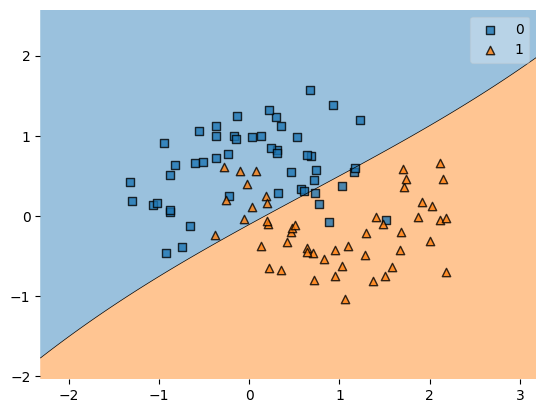

In [41]:
plot_decision_regions(X.to_numpy(),y.astype('int').to_numpy(),clf=model1)